In [30]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import statsmodels.formula.api as sm
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


Assignment 1:
    Catagorical variables: Product_Catagory & Quality
    Figure out reference category (class 3) (this is comparing smth to the others, so for example how much more expensive the food is compared to the other product categories)
    

In [31]:
df = pd.read_csv('1672182Pet shop.csv')
df.head()

,Unnamed: 0,products_sold,product_category,quality,satisfaction,discount,retail_price,perc_physical,market_size
0,1,162907,toys,premium,4.0,4,30.0,54.2,2744
1,2,195042,food,premium,3.9,4,22.0,64.4,3083
2,3,72749,toys,premium,3.2,9,29.0,41.5,1641
3,4,148853,other,off_brand,4.1,4,14.0,54.2,1832
4,5,192908,health,off_brand,4.2,3,5.0,31.2,2967


In [32]:
PS_dummies = pd.get_dummies(df[['product_category', 'quality']]) 
df = pd.concat([df, PS_dummies], axis = 1)
df.head()

#Created dummy variables for the categorical variables.

,Unnamed: 0,products_sold,product_category,quality,satisfaction,discount,retail_price,perc_physical,market_size,product_category_food,product_category_health,product_category_other,product_category_toys,quality_off_brand,quality_premium
0,1,162907,toys,premium,4.0,4,30.0,54.2,2744,False,False,False,True,False,True
1,2,195042,food,premium,3.9,4,22.0,64.4,3083,True,False,False,False,False,True
2,3,72749,toys,premium,3.2,9,29.0,41.5,1641,False,False,False,True,False,True
3,4,148853,other,off_brand,4.1,4,14.0,54.2,1832,False,False,True,False,True,False
4,5,192908,health,off_brand,4.2,3,5.0,31.2,2967,False,True,False,False,True,False


In [33]:
df.isnull().sum() #Ran this command to see wich columns have missing value's
#At first i tried doing this exercise with retail_price as the dependent variable because i thought it would be an interesting statistic.
#But because there are missing value's in that category the CooksD wouldnt work.

Unnamed: 0                   0
products_sold                0
product_category             0
quality                    109
satisfaction                 0
discount                     0
retail_price               155
perc_physical               67
market_size                  0
product_category_food        0
product_category_health      0
product_category_other       0
product_category_toys        0
quality_off_brand            0
quality_premium              0
dtype: int64

In [34]:
df = df.dropna()
#dropped the missing value's

In [35]:
model1 = sm.ols('products_sold~product_category_food+product_category_health+product_category_other+product_category_toys+quality_off_brand+quality_premium+satisfaction+discount+retail_price+perc_physical+market_size',data=df).fit()
print(model1.summary())
#Put all variables into a regression model with products_sold as my dependent variable

                            OLS Regression Results                            
Dep. Variable:          products_sold   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     774.7
Date:                Fri, 05 Apr 2024   Prob (F-statistic):               0.00
Time:                        12:24:41   Log-Likelihood:                -22293.
No. Observations:                1941   AIC:                         4.461e+04
Df Residuals:                    1931   BIC:                         4.466e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

In [36]:
CooksD = model1.get_influence().cooks_distance
n = len(df)
print(CooksD[0])
df['Outlier'] = CooksD[0] > 4/n
#Checked for outliers with CooksD and made a column in df that indicates wether a row contains a outlier.

[5.78022625e-05 2.21611767e-06 3.24637370e-08 ... 2.50250338e-07
 5.99701135e-05 4.89182802e-08]


In [37]:
df.loc[df['Outlier']==True, 'Outlier'] = np.NaN 
#turned outliers into NaN (missing values).

df.head()

/tmp/ipykernel_33988/2652200249.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  df.loc[df['Outlier']==True, 'Outlier'] = np.NaN


,Unnamed: 0,products_sold,product_category,quality,satisfaction,discount,retail_price,perc_physical,market_size,product_category_food,product_category_health,product_category_other,product_category_toys,quality_off_brand,quality_premium,Outlier
0,1,162907,toys,premium,4.0,4,30.0,54.2,2744,False,False,False,True,False,True,False
1,2,195042,food,premium,3.9,4,22.0,64.4,3083,True,False,False,False,False,True,False
2,3,72749,toys,premium,3.2,9,29.0,41.5,1641,False,False,False,True,False,True,False
3,4,148853,other,off_brand,4.1,4,14.0,54.2,1832,False,False,True,False,True,False,False
4,5,192908,health,off_brand,4.2,3,5.0,31.2,2967,False,True,False,False,True,False,False


Assignment 2:

In [38]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
df_as2 = pd.read_csv('1672182Pet shop.csv')

#I used the original dataset to get my imputing and new dummies function to work, i think i couldnt use the outcome from assignment 1 because the df.loc function that turns outliers into missing values deletes whole rows of values,
#but i dont know how to figure that out and googeling / asking chatgpt just made things even more complicated. To continue and try to give as best an answer i could for the rest of the assignments i went back to the original dataset.

In [39]:
df_new = pd.get_dummies(df_as2, dummy_na=True)
#Dealed with categorical missing data by adding a quality_nan and product_category_nan column to show where data missing

df_imputed = IterativeImputer().fit_transform(df_new)
df_imputed = pd.DataFrame(df_imputed, columns=df_new.columns)
#Dealed with continuous missing values by imputing them.

In [40]:
df_imputed.head()

,Unnamed: 0,products_sold,satisfaction,discount,retail_price,perc_physical,market_size,product_category_food,product_category_health,product_category_other,product_category_toys,product_category_nan,quality_off_brand,quality_premium,quality_nan
0,1.0,162907.0,4.0,4.0,30.0,54.2,2744.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,2.0,195042.0,3.9,4.0,22.0,64.4,3083.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,3.0,72749.0,3.2,9.0,29.0,41.5,1641.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,4.0,148853.0,4.1,4.0,14.0,54.2,1832.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,5.0,192908.0,4.2,3.0,5.0,31.2,2967.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [41]:
import scipy.stats
#checking each variable for multicollinearity
check1 = scipy.stats.pearsonr(df_imputed['satisfaction'], df_imputed['discount'])
print("satisfaction vs discount:", check1, "statistic <0,8")
check2 = scipy.stats.pearsonr(df_imputed['satisfaction'], df_imputed['retail_price'])
print("satisfaction vs retail_price:", check2, "statistic <0,8")
check3 = scipy.stats.pearsonr(df_imputed['satisfaction'], df_imputed['perc_physical'])
print("satisfaction vs perc_physical:", check3, "statistic <0,8")
check4 = scipy.stats.pearsonr(df_imputed['satisfaction'], df_imputed['market_size'])
print("satisfaction vs market_size:", check4, "statistic <0,8")
check5 = scipy.stats.pearsonr(df_imputed['discount'], df_imputed['retail_price'])
print("discount vs retail_price:", check5, "statistic <0,8")
check6 = scipy.stats.pearsonr(df_imputed['discount'], df_imputed['perc_physical'])
print("discount vs perc_physical:", check6, "statistic <0,8")
check7 = scipy.stats.pearsonr(df_imputed['discount'], df_imputed['market_size'])
print("discount vs market_size:", check7, "statistic <0,8")
check8 = scipy.stats.pearsonr(df_imputed['retail_price'], df_imputed['perc_physical'])
print("retail_price vs perc_physical:", check8, "statistic <0,8")
check9 = scipy.stats.pearsonr(df_imputed['retail_price'], df_imputed['market_size'])
print("retail_price vs market_size:", check9, "statistic <0,8")
check10 = scipy.stats.pearsonr(df_imputed['perc_physical'], df_imputed['market_size'])
print("perc_physical vs market_size:", check10, "statistic <0,8")
#I am not very satisfied with the way i did this check, but when i tried asking chatgpt i fell down a rabbithole where i didn't fully understand what the code was doing anymore.

#statistic<0.8 on all of them means there is are no multicollinearity issues.

satisfaction vs discount: PearsonRResult(statistic=-0.0022139125990299734, pvalue=0.9164100345388722) statistic <0,8
satisfaction vs retail_price: PearsonRResult(statistic=-0.011360008319278735, pvalue=0.5901832847874632) statistic <0,8
satisfaction vs perc_physical: PearsonRResult(statistic=0.01202199822602835, pvalue=0.5687067592113769) statistic <0,8
satisfaction vs market_size: PearsonRResult(statistic=-0.010358241327122578, pvalue=0.6233736382590963) statistic <0,8
discount vs retail_price: PearsonRResult(statistic=-0.023544050811092513, pvalue=0.26428239301276674) statistic <0,8
discount vs perc_physical: PearsonRResult(statistic=0.027652992659344573, pvalue=0.18978397389053453) statistic <0,8
discount vs market_size: PearsonRResult(statistic=-0.011839080208710407, pvalue=0.5746036162521178) statistic <0,8
retail_price vs perc_physical: PearsonRResult(statistic=0.03372007180058113, pvalue=0.10980964162817236) statistic <0,8
retail_price vs market_size: PearsonRResult(statistic=0.

Assignment 3:

In [42]:
df_imputed.head()

,Unnamed: 0,products_sold,satisfaction,discount,retail_price,perc_physical,market_size,product_category_food,product_category_health,product_category_other,product_category_toys,product_category_nan,quality_off_brand,quality_premium,quality_nan
0,1.0,162907.0,4.0,4.0,30.0,54.2,2744.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,2.0,195042.0,3.9,4.0,22.0,64.4,3083.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,3.0,72749.0,3.2,9.0,29.0,41.5,1641.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,4.0,148853.0,4.1,4.0,14.0,54.2,1832.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,5.0,192908.0,4.2,3.0,5.0,31.2,2967.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


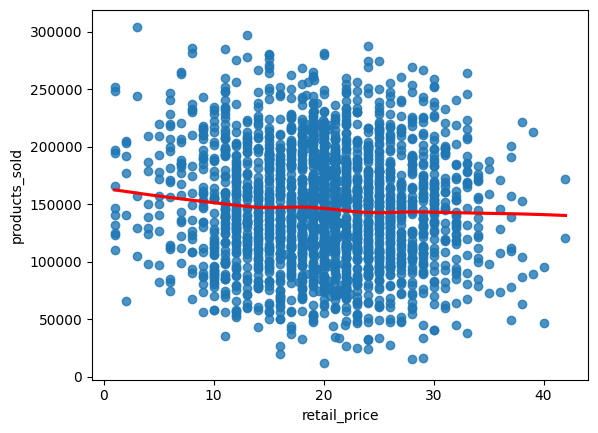

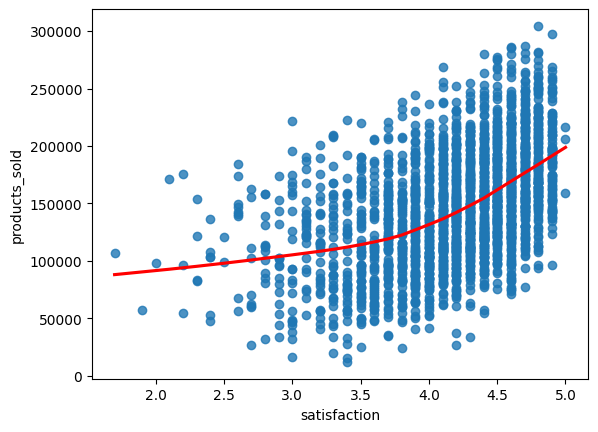

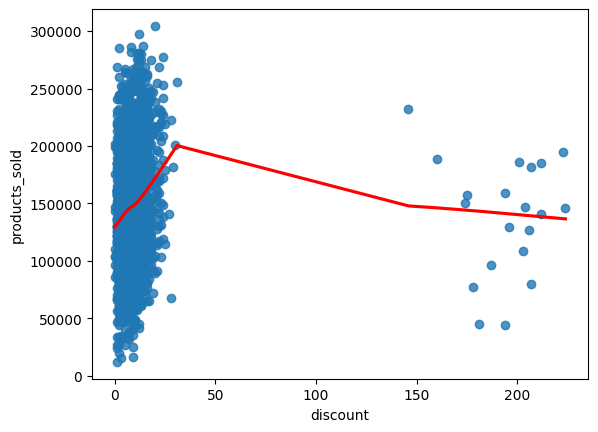

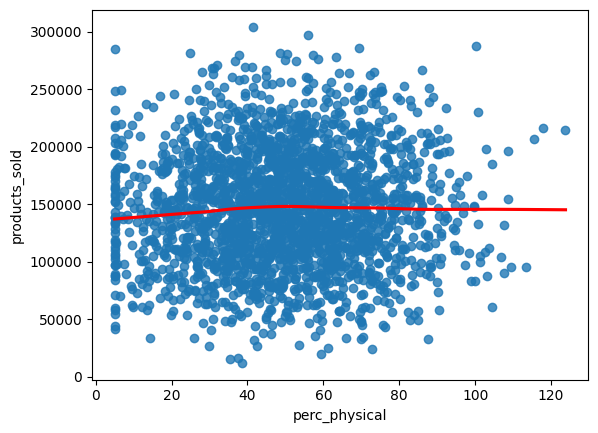

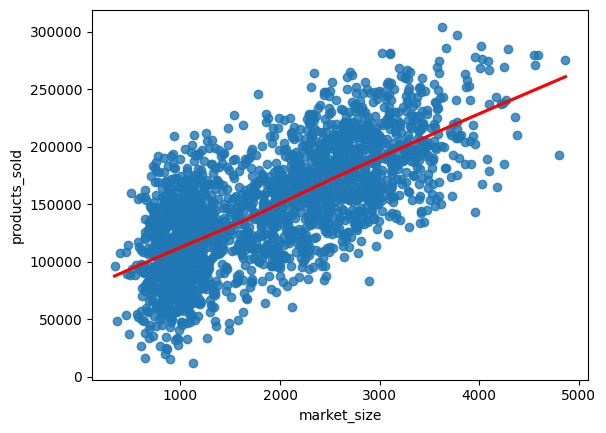

In [43]:
y = df_imputed['products_sold']

lowessplotrp = sns.regplot(x = df_imputed['retail_price'], y = y, lowess = True, line_kws={"color":"red"} ) #this is a non-linear relationship. Decreasing decrease
plt.show(lowessplotrp)

lowessplotsf = sns.regplot(x = df_imputed['satisfaction'], y = y, lowess = True, line_kws={"color":"red"} ) #this is a non-linear relationship. Increasing increase
plt.show(lowessplotsf)

lowessplotdc = sns.regplot(x = df_imputed['discount'], y = y, lowess = True, line_kws={"color":"red"} ) #this is a non-linear relationship. Polynomial
plt.show(lowessplotdc)

lowessplotpp = sns.regplot(x = df_imputed['perc_physical'], y = y, lowess = True, line_kws={"color":"red"} ) #this is a non-linear relationship. Decreasing increase
plt.show(lowessplotpp)

lowessplotms = sns.regplot(x = df_imputed['market_size'], y = y, lowess = True, line_kws={"color":"red"} ) #this is a linear relationship
plt.show(lowessplotms)

#Made lowessplots to check for non-linear relationships


In [44]:
modelretail_price = sm.ols('products_sold~retail_price', data=df_imputed).fit()
print(modelretail_price.summary())

                            OLS Regression Results                            
Dep. Variable:          products_sold   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     12.37
Date:                Fri, 05 Apr 2024   Prob (F-statistic):           0.000444
Time:                        12:24:43   Log-Likelihood:                -27544.
No. Observations:                2250   AIC:                         5.509e+04
Df Residuals:                    2248   BIC:                         5.510e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     1.579e+05   3287.881     48.034   

In [45]:
modelsatisfaction = sm.ols('products_sold~satisfaction', data=df_imputed).fit()
print(modelsatisfaction.summary())

                            OLS Regression Results                            
Dep. Variable:          products_sold   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.221
Method:                 Least Squares   F-statistic:                     640.5
Date:                Fri, 05 Apr 2024   Prob (F-statistic):          1.48e-124
Time:                        12:24:43   Log-Likelihood:                -27268.
No. Observations:                2250   AIC:                         5.454e+04
Df Residuals:                    2248   BIC:                         5.455e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -4.064e+04   7472.185     -5.439   

In [46]:
modeldiscount = sm.ols('products_sold~discount', data=df_imputed).fit()
print(modeldiscount.summary())

                            OLS Regression Results                            
Dep. Variable:          products_sold   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.612
Date:                Fri, 05 Apr 2024   Prob (F-statistic):             0.0575
Time:                        12:24:43   Log-Likelihood:                -27549.
No. Observations:                2250   AIC:                         5.510e+04
Df Residuals:                    2248   BIC:                         5.511e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.459e+05   1198.680    121.730      0.0

In [47]:
modelperc_physical = sm.ols('products_sold~perc_physical', data=df_imputed).fit()
print(modelperc_physical.summary())

                            OLS Regression Results                            
Dep. Variable:          products_sold   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.485
Date:                Fri, 05 Apr 2024   Prob (F-statistic):              0.115
Time:                        12:24:43   Log-Likelihood:                -27549.
No. Observations:                2250   AIC:                         5.510e+04
Df Residuals:                    2248   BIC:                         5.511e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       1.43e+05   2711.779     52.749

In [48]:
modelmarket_size = sm.ols('products_sold~market_size', data=df_imputed).fit()
print(modelmarket_size.summary())

                            OLS Regression Results                            
Dep. Variable:          products_sold   R-squared:                       0.499
Model:                            OLS   Adj. R-squared:                  0.498
Method:                 Least Squares   F-statistic:                     2235.
Date:                Fri, 05 Apr 2024   Prob (F-statistic):               0.00
Time:                        12:24:43   Log-Likelihood:                -26774.
No. Observations:                2250   AIC:                         5.355e+04
Df Residuals:                    2248   BIC:                         5.356e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    7.365e+04   1723.561     42.729      

I tried doing numpy.log, numpy.log10 and pow(df.X, 2) respectively for the fitting categories.
But it did not change the models R-squared values or the model fit.

Assignment 4:

In [49]:
df_imputed.head()

,Unnamed: 0,products_sold,satisfaction,discount,retail_price,perc_physical,market_size,product_category_food,product_category_health,product_category_other,product_category_toys,product_category_nan,quality_off_brand,quality_premium,quality_nan
0,1.0,162907.0,4.0,4.0,30.0,54.2,2744.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,2.0,195042.0,3.9,4.0,22.0,64.4,3083.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,3.0,72749.0,3.2,9.0,29.0,41.5,1641.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,4.0,148853.0,4.1,4.0,14.0,54.2,1832.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,5.0,192908.0,4.2,3.0,5.0,31.2,2967.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [50]:
df_graph = df_imputed.copy()
df_graph.drop(['product_category_food', 'product_category_health', 'product_category_other', 'product_category_toys', 'product_category_nan', 'quality_off_brand', 'quality_premium', 'quality_nan'], axis=1, inplace=True)
df_graph.head()
#dropping all the categories not needed for the graph

,Unnamed: 0,products_sold,satisfaction,discount,retail_price,perc_physical,market_size
0,1.0,162907.0,4.0,4.0,30.0,54.2,2744.0
1,2.0,195042.0,3.9,4.0,22.0,64.4,3083.0
2,3.0,72749.0,3.2,9.0,29.0,41.5,1641.0
3,4.0,148853.0,4.1,4.0,14.0,54.2,1832.0
4,5.0,192908.0,4.2,3.0,5.0,31.2,2967.0


In [51]:
model2 = sm.ols('products_sold~product_category_food+product_category_health+product_category_other+product_category_toys+quality_off_brand+quality_premium+satisfaction+discount+retail_price+perc_physical+market_size+product_category_nan+quality_nan',data=df_imputed).fit()
print(model2.summary())
#made a final model used for finding what influence certain variables had on how many products were sold.

                            OLS Regression Results                            
Dep. Variable:          products_sold   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     792.6
Date:                Fri, 05 Apr 2024   Prob (F-statistic):               0.00
Time:                        12:24:44   Log-Likelihood:                -25848.
No. Observations:                2250   AIC:                         5.172e+04
Df Residuals:                    2239   BIC:                         5.178e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept               -6

/home/codespace/.python/current/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])


What we see in the regression is that all the numerical variables (except for one): satisfaction, discount and perc_physical. Have a positive Slope Coefficient, this means that if the customers get a bigger discount, buy more in-person at stores or are more satisfied with their products they in general buy more products. The exception for the numerical variables is retail_price, wich has a negative slope. When the retail price goes up the customers buy less products.

In [52]:
model_msrp = sm.ols('products_sold~market_size+retail_price', data=df_imputed).fit()
print(model_msrp.summary())

#As seen in the regression model the retail_prize has a bigger (negative) Slope Coefficient.
#This means that retail_price has a bigger impact on the amount of products sold. The first group is correct.

                            OLS Regression Results                            
Dep. Variable:          products_sold   R-squared:                       0.506
Model:                            OLS   Adj. R-squared:                  0.506
Method:                 Least Squares   F-statistic:                     1152.
Date:                Fri, 05 Apr 2024   Prob (F-statistic):               0.00
Time:                        12:24:44   Log-Likelihood:                -26757.
No. Observations:                2250   AIC:                         5.352e+04
Df Residuals:                    2247   BIC:                         5.354e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     8.641e+04   2759.603     31.313   

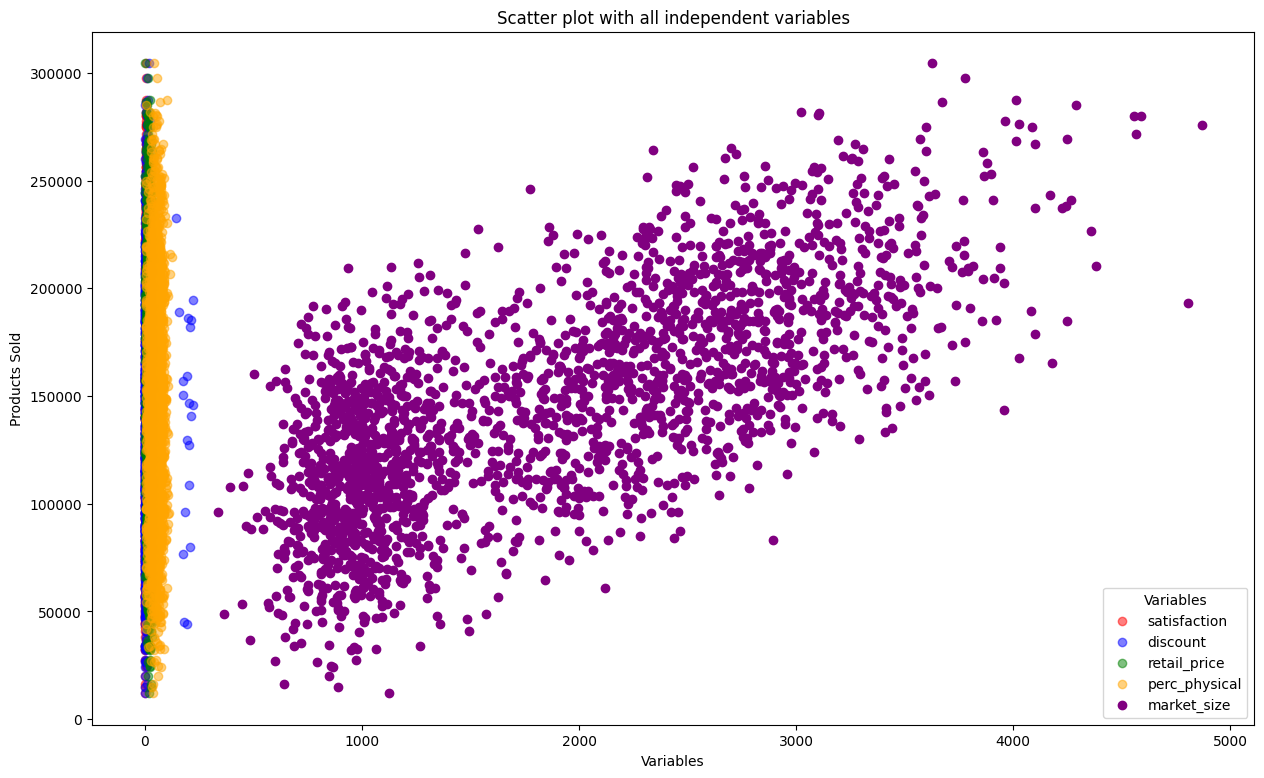

In [53]:
x1 = df_graph['satisfaction']
x2 = df_graph['discount']
x3 = df_graph['retail_price']
x4 = df_graph['perc_physical']
x5 = df_graph['market_size']
y = df_graph['products_sold']

plt.figure(figsize=(15, 9)) 
plt.scatter(x1, y, color='red', label='satisfaction', alpha=0.5)
plt.scatter(x2, y, color='blue', label='discount', alpha=0.5)
plt.scatter(x3, y, color='green', label='retail_price', alpha=0.5)
plt.scatter(x4, y, color='orange', label='perc_physical', alpha=0.5)
plt.scatter(x5, y, color='purple', label='market_size')

plt.xlabel('Variables')
plt.ylabel('Products Sold')
plt.title('Scatter plot with all independent variables')
plt.legend(title='Variables')


plt.show()

In [54]:
marketsize_010 = df_graph['market_size']/10

#because market_size is so much bigger than the other variables i am dividing it by 10, so that its numbers on a relitive lvl stay the same, but the graph becomes more readable

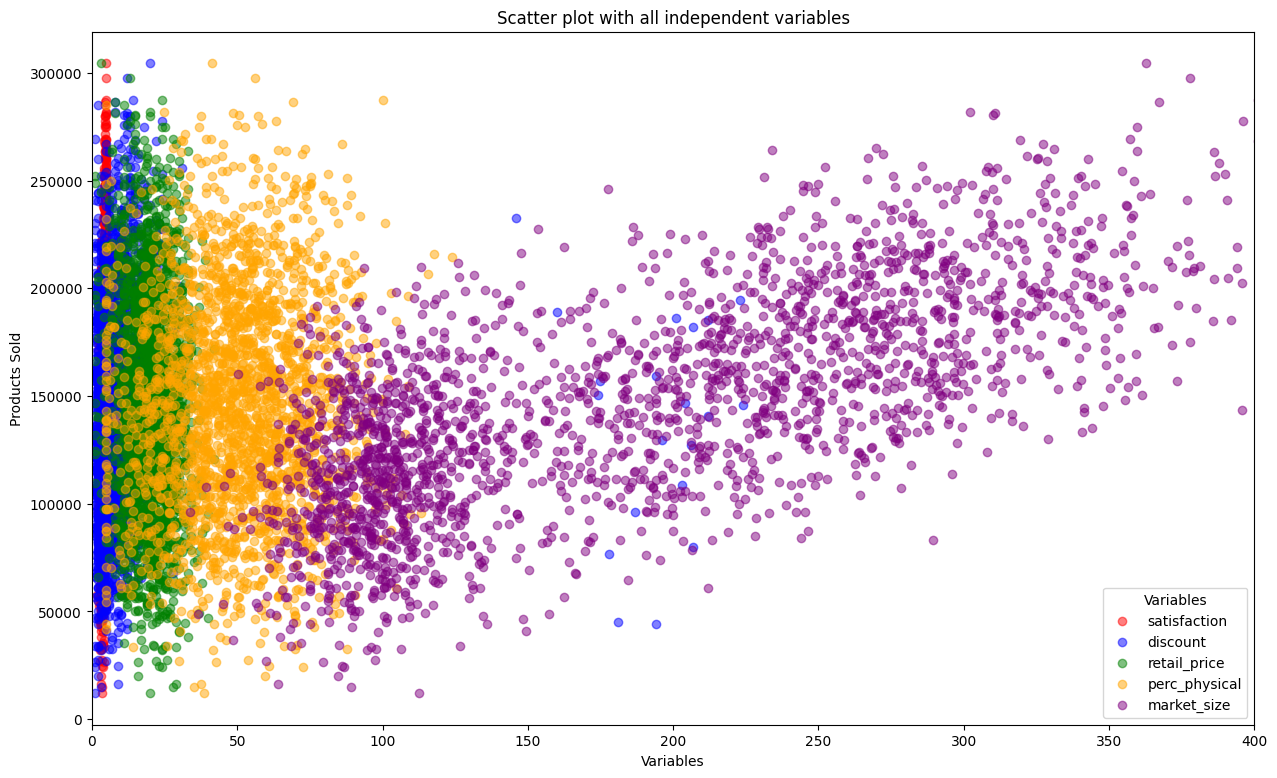

In [55]:
x1 = df_graph['satisfaction']
x2 = df_graph['discount']
x3 = df_graph['retail_price']
x4 = df_graph['perc_physical']
x5 = marketsize_010
y = df_graph['products_sold']

plt.figure(figsize=(15, 9)) 
plt.scatter(x1, y, color='red', label='satisfaction', alpha=0.5)
plt.scatter(x2, y, color='blue', label='discount', alpha=0.5)
plt.scatter(x3, y, color='green', label='retail_price', alpha=0.5)
plt.scatter(x4, y, color='orange', label='perc_physical', alpha=0.5)
plt.scatter(x5, y, color='purple', label='market_size', alpha=0.5)

plt.xlabel('Variables')
plt.ylabel('Products Sold')
plt.title('Scatter plot with all independent variables')
plt.legend(title='Variables')

plt.xlim(0, 400)

plt.show()

Assignment 5:

In [56]:
df_imputed.head()

,Unnamed: 0,products_sold,satisfaction,discount,retail_price,perc_physical,market_size,product_category_food,product_category_health,product_category_other,product_category_toys,product_category_nan,quality_off_brand,quality_premium,quality_nan
0,1.0,162907.0,4.0,4.0,30.0,54.2,2744.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,2.0,195042.0,3.9,4.0,22.0,64.4,3083.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,3.0,72749.0,3.2,9.0,29.0,41.5,1641.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,4.0,148853.0,4.1,4.0,14.0,54.2,1832.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,5.0,192908.0,4.2,3.0,5.0,31.2,2967.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [57]:
df_a5 = pd.DataFrame([[0.1, 0, 4.6, 20.0, 10.0, 55.0, 1000, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0,]], columns=df_imputed.columns)
df_a5.head()

#To create a prediction i first made a new dataset with all the characteristics given in assignment 5 and the columns from my dataset df_imputed wich i based model2 on.

,Unnamed: 0,products_sold,satisfaction,discount,retail_price,perc_physical,market_size,product_category_food,product_category_health,product_category_other,product_category_toys,product_category_nan,quality_off_brand,quality_premium,quality_nan
0,0.1,0,4.6,20.0,10.0,55.0,1000,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [58]:
print(model2.predict(df_a5))

#I used my regression model to predict how many products would sell.

0    125033.643235
dtype: float64


Since we can't sell .64 product rounded the products_sold down to 125033.
By comparing this number to the rest of the dataset it does not seem like something out of the ordinairy, so i would say it is a fairly accurate prediction.